### Business Case:
Develop a machine learning model that can  classify the x-ray image of chest


### PROJECT GOAL:

Create a model that can detect  Pneumonia from x-ray images of chest


# 1- Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

# Different CNN Model
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3,InceptionResNetV2, MobileNetV2, DenseNet121

# To chain two different data augmented images for training
from itertools import chain

#  Distributed Computing
import tensorflow as tf

## 2. Parameter Setup for Model Training

In [ ]:
BATCH_SIZE = 16
image_height = 128
image_width = 128

# 3- Load DataSet

> ## Extract Compressed Files

In [ ]:
# execute this only once... if you run again, skip this part
import zipfile
with zipfile.ZipFile("Chest-Xray-2.zip" as zip_ref:        # get the path for train.zip using copypath. paste the link within the quotation
     # creates new folder 'cats_dogs_images' and saves all images present in train.zip
    zip_ref.extractall("extracted_images")  # create a new folder, rename it and get the path of it using copypath.. paste the link here



In [ ]:
files_list = os.listdir("extracted_images")

# Count the number of files
num_files = len(files_list)
print(num_files)
# Print the names of the files
for file_name in files_list:
    print(file_name)

1
chest_xray


In [ ]:
files_list = os.listdir("extracted_images/chest_xray")

# Count the number of files
num_files = len(files_list)
print(num_files)
# Print the names of the files
for file_name in files_list:
    print(file_name)

3
train
val
test


In [ ]:
train_path="extracted_images/chest_xray/train"
test_path="extracted_images/chest_xray/test"
val_path="extracted_images/chest_xray/val"

In [ ]:
files_list = os.listdir(train_path)

# Count the number of files
num_files = len(files_list)
print(num_files)
# Print the names of the files
for file_name in files_list:
    print(file_name)

3
PNEUMONIA
NORMAL
.DS_Store


# 4. Image Augmentation: Enhance model generalization

In [ ]:
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'
                        )

data_generator_2 = ImageDataGenerator (rescale=1./255)
data_generator_3 = ImageDataGenerator (rescale=1./255)

In [ ]:
train_generator = data_generator_1.flow_from_directory(
    directory = train_path, # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

val_generator=data_generator_2.flow_from_directory(
    directory = val_path, # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42
)
test_generator = data_generator_3.flow_from_directory(
    directory = test_path, # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# 5. EDA

## 5.1 Distribution of Class Label

In [ ]:
dict_class = train_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


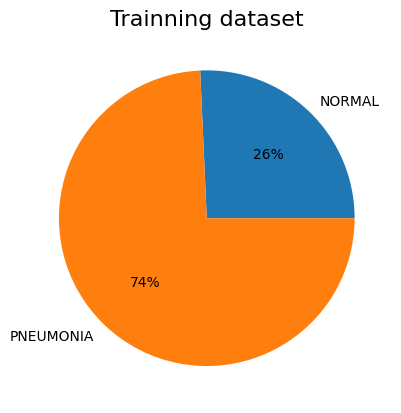

In [ ]:
frequency = np.unique(train_generator.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [ ]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator.classes))
print("Number of normal images:", len([label for label in train_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in train_generator.classes if label == 1]))
print()
print("Dataset Characteristics of Validation Data Set:")
print("Number of images:", len(val_generator.classes))
print("Number of normal images:", len([label for label in val_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in val_generator.classes if label == 1]))
print()
print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of normal images:", len([label for label in test_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 1]))
print()


Dataset Characteristics of Train Data Set:
Number of images: 5216
Number of normal images: 1341
Number of pneumonia images: 3875

Dataset Characteristics of Validation Data Set:
Number of images: 16
Number of normal images: 8
Number of pneumonia images: 8

Dataset Characteristics of Test Data Set:
Number of images: 624
Number of normal images: 234
Number of pneumonia images: 390



## 5.2 Class Weights

In [ ]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator.classes), y= train_generator.classes)
class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

## 5.3 Image Samples

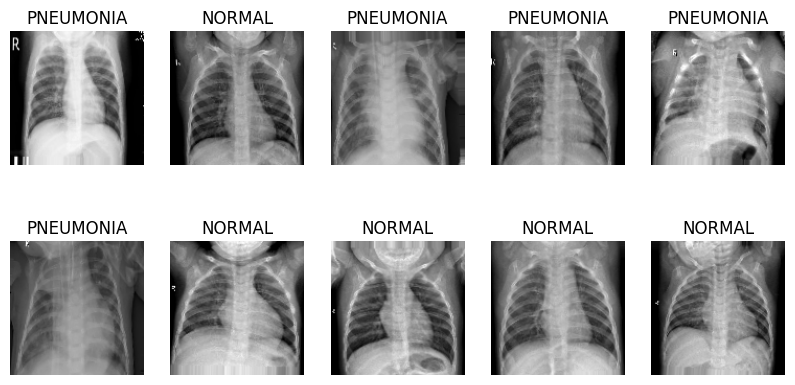

In [ ]:
img, label = next(train_generator)


plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.show()


# 6. Convolutional neural networks (CNNs)

In [ ]:
# Define the epochs for training
EPOCHS = 2

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', #Monitor validation accuracy
                               patience=2, #wait 2 epochs before stopping
                               verbose=1,
                               restore_best_weights=True #Revert to the best parameters after stopping
                              )
#The ReduceLROnPlateau callback reduces the learning rate when the validation accuracy stops improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',# Monitor validation accuracy
                              factor=0.001,# Multiply the learning rate by 0.001
                              patience=10,# Wait 10 epochs without improvement
                              verbose=1)


train_data = train_generator

## 6.1. InceptionV3

In [ ]:

# Load the pre-trained InceptionV3 model without the top classification layer
base_model_Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Set the layers of the base model as non-trainable (freeze them)
for layer in base_model_Inception.layers:
    layer.trainable = False

# Create a new model and add the InceptionV3 base model
model_Inception = Sequential()
model_Inception.add(base_model_Inception)

# Add a global average pooling layer and output layer for classification
model_Inception.add(GlobalAveragePooling2D())
model_Inception.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_Inception.add(Dropout(0.4))
model_Inception.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_Inception.add(Dropout(0.2))

model_Inception.add(Dense(2, activation='softmax'))

# Model summary
print("Model Summary (InceptionV3):")
model_Inception.summary()
print()

# Compile the model
model_Inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping
history_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)
# Validate the model
val_loss_Inception, val_accuracy_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_Inception:.4f}')
print(f'Validation Accuracy: {val_accuracy_Inception:.4f}')


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model Summary (InceptionV3):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,073,442 (84.20 MB)

 Trainable params: 270,658 (1.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


326/326 ━━━━━━━━━━━━━━━━━━━━ 289s 852ms/step - accuracy: 0.7875 - loss: 0.8976 - val_accuracy: 0.8221 - val_loss: 0.6603
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 330s 876ms/step - accuracy: 0.8854 - loss: 0.4752 - val_accuracy: 0.7997 - val_loss: 0.6526
Restoring model weights from the end of the best epoch: 1.
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 660ms/step - accuracy: 0.8149 - loss: 0.6658
Validation Loss: 0.6603
Validation Accuracy: 0.8221


## 6.2. InceptionResNetV2

In [ ]:

# Load the pre-trained InceptionV3 model without the top classification layer
base_model_Inception_ResNetv2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Set the layers of the base model as non-trainable (freeze them)
for layer in base_model_Inception_ResNetv2.layers:
    layer.trainable = False

# Create a new model and add the InceptionV3 base model
model_InceptionRes = Sequential()
model_InceptionRes.add(base_model_Inception_ResNetv2)

# Add a global average pooling layer and output layer for classification
model_InceptionRes.add(GlobalAveragePooling2D())
model_InceptionRes.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_InceptionRes.add(Dropout(0.4))
model_InceptionRes.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_InceptionRes.add(Dropout(0.2))

model_InceptionRes.add(Dense(2, activation='softmax'))

# Model summary
print("Model Summary (InceptionResNetV2):")
model_InceptionRes.summary()
print()

# Compile the model
model_InceptionRes.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping
history_InceptionResNetV2 = model_InceptionRes.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)
# Validate the model
val_loss_InceptionResNetv2, val_accuracy_InceptionResNetv2 = model_InceptionRes.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_InceptionResNetv2:.4f}')
print(f'Validation Accuracy: {val_accuracy_InceptionResNetv2:.4f}')



219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model Summary (InceptionResNetV2):


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 2, 2, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,541,858 (208.06 MB)

 Trainable params: 205,122 (801.26 KB)

 Non-trainable params: 54,336,736 (207.28 MB)


Epoch 1/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.7533 - loss: 1.1666 - val_accuracy: 0.8397 - val_loss: 0.5644
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step - accuracy: 0.8776 - loss: 0.4880 - val_accuracy: 0.8558 - val_loss: 0.5149
Restoring model weights from the end of the best epoch: 2.
39/39 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8510 - loss: 0.5226
Validation Loss: 0.5149
Validation Accuracy: 0.8558


## 6.3 VGG16

In [ ]:
# Load the pre-trained VGG16 model without the top classification layer
base_model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))
# Set the layers of the base model as non-trainable (freeze them)
for layer in base_model_VGG16.layers:
    layer.trainable = False

# Create a new model and add the VGG16 base model
model_VGG16 = Sequential()
model_VGG16.add(base_model_VGG16)

# Add a fully connected layer and output layer for classification
model_VGG16.add(GlobalAveragePooling2D())
model_VGG16.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model_VGG16.add(Dropout(0.4))
model_VGG16.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model_VGG16.add(Dropout(0.2))
model_VGG16.add(Dense(2, activation='softmax'))

# Model summary
print("Model Summary (VGG16):")
model_VGG16.summary()
print()

# Compile the model
model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history_VGG16 = model_VGG16.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)
# Validate the model
val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_VGG16:.4f}')
print(f'Validation Accuracy: {val_accuracy_VGG16:.4f}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Summary (VGG16):


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,788,738 (56.41 MB)

 Trainable params: 74,050 (289.26 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Epoch 1/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 1276s 4s/step - accuracy: 0.7274 - loss: 0.6697 - val_accuracy: 0.8349 - val_loss: 0.4730
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 1281s 4s/step - accuracy: 0.8970 - loss: 0.3423 - val_accuracy: 0.8766 - val_loss: 0.3675
Restoring model weights from the end of the best epoch: 2.
39/39 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.8768 - loss: 0.3597
Validation Loss: 0.3675
Validation Accuracy: 0.8766


## 6.4 MobileNetV2

In [ ]:

# Load the pre-trained MobileNetV2 model without the top classification layer
base_model_MobileNet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Set the layers of the base model as non-trainable (freeze them)
for layer in base_model_MobileNet.layers:
    layer.trainable = False

# Create a new model and add the MobileNetV2 base model
model_MobileNet = Sequential()
model_MobileNet.add(base_model_MobileNet)

# Add a global average pooling layer and output layer for classification
model_MobileNet.add(GlobalAveragePooling2D())
model_MobileNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_MobileNet.add(Dropout(0.4))
model_MobileNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_MobileNet.add(Dropout(0.2))
model_MobileNet.add(Dense(2, activation='softmax'))

# Model summary
print("Model Summary (MobileNetV2):")
model_MobileNet.summary()
print()

# Compile the model
model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_MobileNet = model_MobileNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

# Validate the model
val_loss_MobileNet, val_accuracy_MobileNet = model_MobileNet.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_MobileNet:.4f}')
print(f'Validation Accuracy: {val_accuracy_MobileNet:.4f}')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Summary (MobileNetV2):


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,430,338 (9.27 MB)

 Trainable params: 172,354 (673.26 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Epoch 1/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 154s 445ms/step - accuracy: 0.8568 - loss: 0.5581 - val_accuracy: 0.8686 - val_loss: 0.4379
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 201s 438ms/step - accuracy: 0.9270 - loss: 0.3136 - val_accuracy: 0.7933 - val_loss: 0.5817
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.8896 - loss: 0.3956
Validation Loss: 0.4379
Validation Accuracy: 0.8686


## 6.5 DenseNet

In [ ]:

# Load the pre-trained DenseNet121 model without the top classification layer
base_model_DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Set the layers of the base model as non-trainable (freeze them)
for layer in base_model_DenseNet.layers:
    layer.trainable = False

# Create a new model and add the DenseNet121 base model
model_DenseNet = Sequential()
model_DenseNet.add(base_model_DenseNet)

# Add a global average pooling layer and output layer for classification
model_DenseNet.add(GlobalAveragePooling2D())
model_DenseNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_DenseNet.add(Dropout(0.4))
model_DenseNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_DenseNet.add(Dropout(0.2))
model_DenseNet.add(Dense(2, activation='softmax'))

# Model summary
print("Model Summary (DenseNet121):")
model_DenseNet.summary()
print()

# Compile the model
model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_DenseNet = model_DenseNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

# Validate the model
val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_DenseNet:.4f}')
print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Summary (DenseNet121):


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,177,090 (27.38 MB)

 Trainable params: 139,586 (545.26 KB)

 Non-trainable params: 7,037,504 (26.85 MB)


Epoch 1/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.8123 - loss: 0.6320 - val_accuracy: 0.8558 - val_loss: 0.4918
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9115 - loss: 0.3222 - val_accuracy: 0.8574 - val_loss: 0.4241
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 942ms/step - accuracy: 0.8511 - loss: 0.5219
Validation Loss: 0.4918
Validation Accuracy: 0.8558


## 6.6 Comparing model performance

In [ ]:

data = {
    'InceptionV3': val_accuracy_Inception,
    'InceptionResNetV2': val_accuracy_InceptionResNetv2,
    'VGG16': val_accuracy_VGG16,
    'MobileNet': val_accuracy_MobileNet,
    'DenseNet': val_accuracy_DenseNet,
}


In [ ]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

In [ ]:
df

,model,accuracy
0,InceptionV3,0.822115
1,InceptionResNetV2,0.855769
2,VGG16,0.876603
3,MobileNet,0.868590
4,DenseNet,0.855769


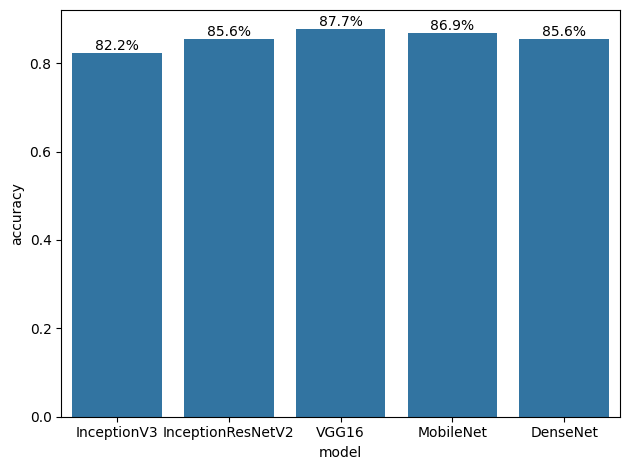

In [ ]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

## 7.Fine-tune Modelling

In [ ]:
# Unfreeze the base_model
no_base_layers = len(model_Inception.layers)
print('No. of base layers in the model = {}\n'.format(no_base_layers))

# no of layers for fine-tune
no_finetune_layers = int(no_base_layers/2)
print('No. of layers for fine-tune = {}'.format(no_finetune_layers))

No. of base layers in the model = 7

No. of layers for fine-tune = 3


In [ ]:
# Fine-tune the model
model_Inception.trainable = True
for layer in model_Inception.layers[: -no_finetune_layers]:
    layer.trainable = False

# small learning rate for fine tuning
model_Inception.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping])


Epoch 1/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 285s 838ms/step - accuracy: 0.8953 - loss: 0.3315 - val_accuracy: 0.8221 - val_loss: 0.5186
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 335s 876ms/step - accuracy: 0.8893 - loss: 0.3374 - val_accuracy: 0.8221 - val_loss: 0.5221
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
# Validate the model
print('====== Model Validation ======')
val_loss_finetune_Inception, val_accuracy_finetune_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_finetune_Inception:.4f}')
print(f'Validation Accuracy: {val_accuracy_finetune_Inception:.4f}')

====== Model Validation ======
39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 624ms/step - accuracy: 0.8491 - loss: 0.4501
Validation Loss: 0.5186
Validation Accuracy: 0.8221


In [ ]:
# Perform predictions to allow computation of the confusion matrix later on
# Do not shuffle predictions otherwise we have no way of finding out the true labels
# val_generator.reset()
Inception_test_preds = model_Inception.predict(test_generator)
Inception_test_pred_classes = np.argmax(Inception_test_preds, axis=1)

39/39 ━━━━━━━━━━━━━━━━━━━━ 29s 653ms/step


## 8. Prediction Result Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


IndexError: index 16 is out of bounds for axis 0 with size 16

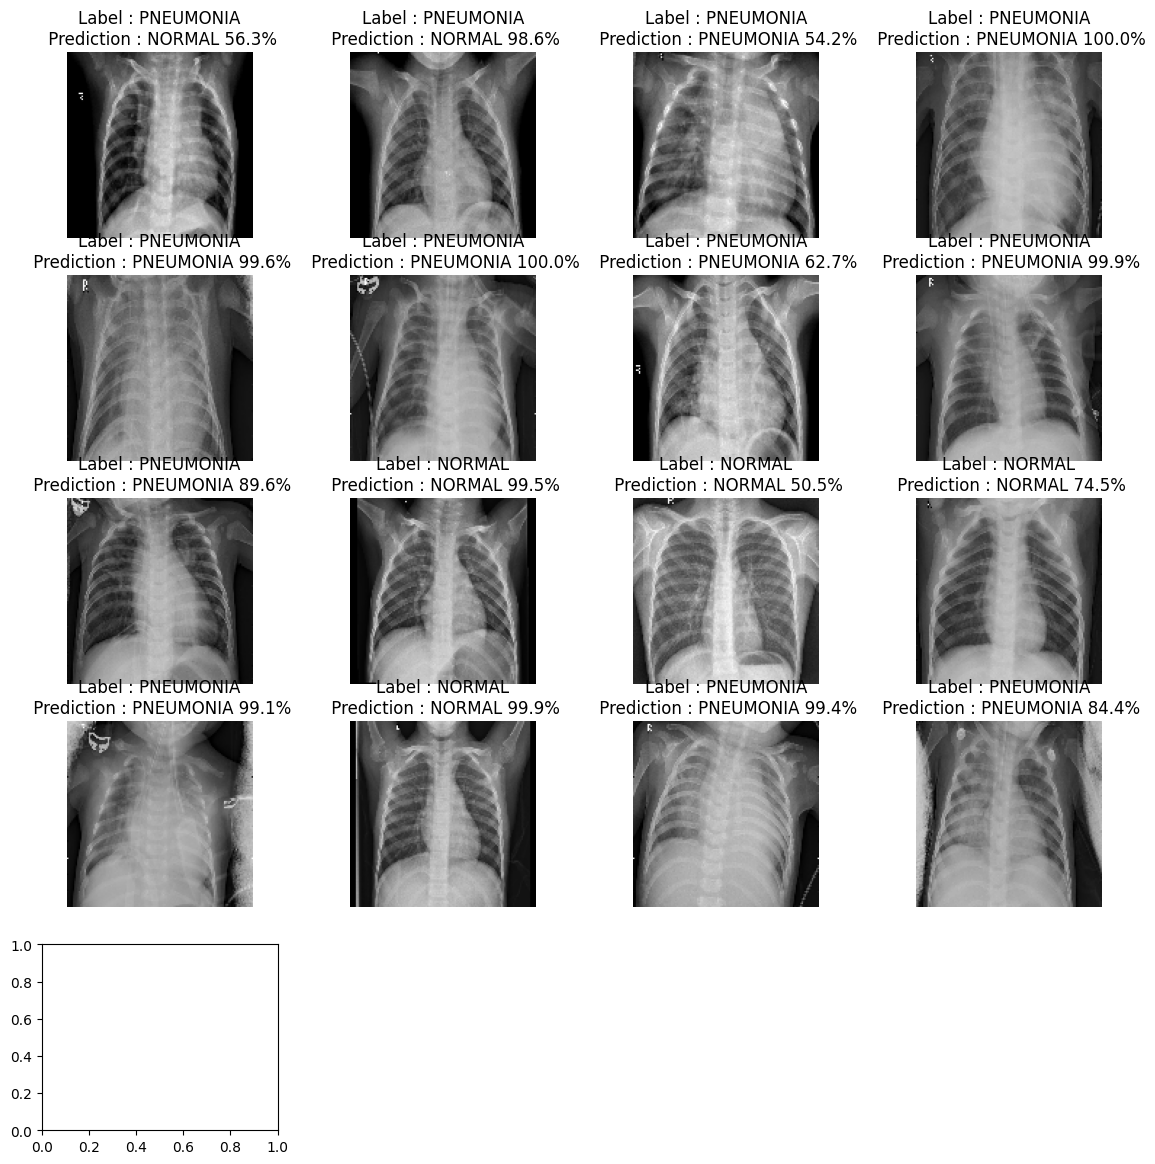

In [ ]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_Inception.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(16):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

In [ ]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_InceptionRes.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(16):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

# Conclusion:


**In this project, various pre-trained Convolutional Neural Networks (CNNs) were evaluated to detect pneumonia effectively. The models tested include VGG16, MobileNet, DenseNet, and Inception. Their performance, measured in terms of accuracy, is summarized as follows:**

* MobileNet achieved the highest accuracy of 88.6%, demonstrating its efficiency in balancing computational cost and prediction accuracy.
* Inception and VGG16 followed, with accuracies of 85.3% and 85.1%, respectively, showing robust performance in handling the dataset.
* DenseNet, while still effective, had the lowest accuracy of 79.8%, indicating room for optimization or potential limitations in this context.

In [ ]:
df